In [6]:
import jax
import numpy as onp
import jax.numpy as np
from jax import jit, vmap
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm as t
from ipywidgets import interact
from jax import grad
from jax.scipy.optimize import minimize
from jax.config import config
config.update("jax_enable_x64", True)
from jax.scipy.linalg import cho_factor, cho_solve
from functools import reduce
#from jax.scipy.optimize import minimize
#from jaxopt import ProjectedGradient
#from jaxopt.projection import projection_box

In [7]:
#Lorentz 96

$$
\dfrac{dx_i}{dt} = (x_{i+1} - x_{i-2})x_{i-1} - x_{i} + F
$$



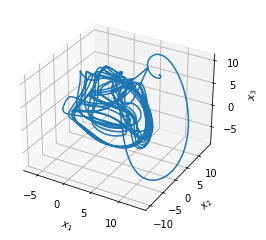

In [10]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint

# These are our constants
N = 5  # Number of variables
F = 8  # Forcing


def L96(x, t):
    """Lorenz 96 model with constant forcing"""
    # Setting up vector
    d = onp.zeros(N)
    # Loops over indices (with operations and Python underflow indexing handling edge cases)
    for i in range(N):
        d[i] = (x[(i + 1) % N] - x[i - 2]) * x[i - 1] - x[i] + F
    return d


x0 = F * onp.ones(N)  # Initial state (equilibrium)
x0[0] += 0.01  # Add small perturbation to the first variable
t = np.arange(0.0, 30.0, 0.01)

x = odeint(L96, x0, t)

# Plot the first three variables
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(x[:, 0], x[:, 1], x[:, 2])
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$x_3$")
plt.show()


In [15]:
derivatives = [L96(i, None) for i in x]

In [21]:
X = np.hstack((x, derivatives)).T

In [22]:
X.shape

(10, 3000)

In [12]:
possible_edges = [] #directed: (1, 2) means there could be a function mapping 1 to 2
#In this case (i -> j) for all i in [0, 4] and all j in [5, 9]
for i in range(5):
    for j in range(5, 10):
        possible_edges.append([i,j])

In [23]:
names = ['x'+str(i) for i in range(1,6)]
dnames = ['d'+i+'/dt' for i in names]
names = names + dnames

$$
\dfrac{dx_i}{dt} = (x_{i+1} - x_{i-2})x_{i-1} - x_{i} + F
$$

Node dx1/dt, E_Signal = 2.0891462831811562, E_Noise = 0.00486749258988537
Node dx1/dt has ancestors
Decomposing E_signal = 2.0891462831811562 in without x1 = 1.0313046451630963 and with x1 = 1.060042487447895
Noise/Signal Energy Ratio: 0.4931293466692638
Decomposing E_signal = 2.0891462831811562 in without x2 = 1.0309803054183648 and with x2 = 1.0678941075917905
Noise/Signal Energy Ratio: 0.49120628610635053
Decomposing E_signal = 2.0891462831811562 in without x3 = 1.0464256677005082 and with x3 = 1.0446097865420905
Noise/Signal Energy Ratio: 0.5004342062098309
Decomposing E_signal = 2.0891462831811562 in without x4 = 1.0308436115468633 and with x4 = 1.0608060218891795
Noise/Signal Energy Ratio: 0.49283761250848324
Decomposing E_signal = 2.0891462831811562 in without x5 = 1.0149509185279961 and with x5 = 1.0796391216582648
Noise/Signal Energy Ratio: 0.4845582663220064
Node dx1/dt has the ancestors ['x1', 'x2', 'x4', 'x5']
Node dx2/dt, E_Signal = 2.094527328632303, E_Noise = 0.004837291

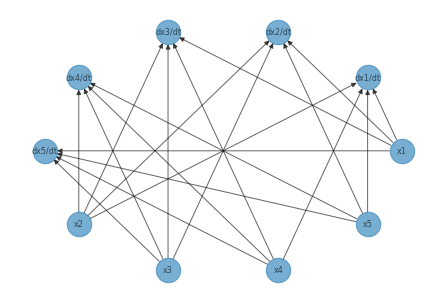

In [71]:
from graph_discovery import build_graph
from kernels import kpoly as k
ks = [k]*8

build_graph(X, ks, possible_edges=possible_edges, γ2 = 0.495, nugget=1e-8, names = names, verbose = True, plot = True)

In [72]:
#This is the right graph, but depends a lot on the value of γ2